# <b><span style='color:#F1A424'>AutoCluster - Mall Customer Data</span> </b>

### Disclaimer
Please note, the Vantage Functions via SQLAlchemy feature is a preview/beta code release with limited functionality (the “Code”). As such, you acknowledge that the Code is experimental in nature and that the Code is provided “AS IS” and may not be functional on any machine or in any environment. TERADATA DISCLAIMS ALL WARRANTIES RELATING TO THE CODE, EXPRESS OR IMPLIED, INCLUDING, BUT NOT LIMITED TO, ANY WARRANTIES AGAINST INFRINGEMENT OF THIRD-PARTY RIGHTS, MERCHANTABILITY AND FITNESS FOR A PARTICULAR PURPOSE.

TERADATA SHALL NOT BE RESPONSIBLE OR LIABLE WITH RESPECT TO ANY SUBJECT MATTER OF THE CODE UNDER ANY CONTRACT, NEGLIGENCE, STRICT LIABILITY OR OTHER THEORY 
    (A) FOR LOSS OR INACCURACY OF DATA OR COST OF PROCUREMENT OF SUBSTITUTE GOODS, SERVICES OR TECHNOLOGY, OR 
    (B) FOR ANY INDIRECT, INCIDENTAL OR CONSEQUENTIAL DAMAGES INCLUDING, BUT NOT LIMITED TO LOSS OF REVENUES AND LOSS OF PROFITS. TERADATA SHALL NOT BE RESPONSIBLE FOR ANY MATTER BEYOND ITS REASONABLE CONTROL.

Notwithstanding anything to the contrary: 
    (a) Teradata will have no obligation of any kind with respect to any Code-related comments, suggestions, design changes or improvements that you elect to provide to Teradata in either verbal or written form (collectively, “Feedback”), and 
    (b) Teradata and its affiliates are hereby free to use any ideas, concepts, know-how or techniques, in whole or in part, contained in Feedback: 
        (i) for any purpose whatsoever, including developing, manufacturing, and/or marketing products and/or services incorporating Feedback in whole or in part, and 
        (ii) without any restrictions or limitations, including requiring the payment of any license fees, royalties, or other consideration. 

## <b> Problem overview:</b>
    

**Dataset used - Mall Customer Dataset**

**Features**:

- `CustomerID`: customer_id .
- `Gender`: Gender of customer.
- `Age`: Age of customer.
- `Annual_Income`: Annual Income of Customer in k$.
- `Spending_Score`: Score assigned by mall based on customer behaviour and spending(1-100).

**Target Variable**:

- No target variable for clustering.

        
**Objective**:

The primary objective is typically to build a model that can accurately segregate the dataset into clusters.

**Usecase**:

Here, we will use AutoCluster(Automated Machine Learning for Clustering) functionality to automate the entire process of developing a predictive model. It will perform feature exploration, feature engineering, data preparation, model training and evaluation on dataset in auto run and at end we will get leaderboard containined different models along with their performance. Model will also have rank associated with them which indicates which is best performing model for given data followed by other models.

In [1]:
from teradataml import AutoML, AutoCluster

In [2]:
import getpass
from teradataml import create_context, remove_context
from teradataml import DataFrame
from teradataml import load_example_data
from teradataml import TrainTestSplit
from teradataml import copy_to_sql

In [4]:
import warnings
warnings.filterwarnings("ignore")

In [6]:
host = getpass.getpass("Host: ")
username = getpass.getpass("Username: ")
password = getpass.getpass("Password: ")

con = create_context(host=host, username=username, password=password)

## <b><span style='color:#F1A424'>| Dataset Creation </b>

In [15]:
create_table = """CREATE MULTISET TABLE Mall_customer_data,
    FALLBACK,
    NO BEFORE JOURNAL,
    NO AFTER JOURNAL,
    CHECKSUM = DEFAULT,
    DEFAULT MERGEBLOCKRATIO,
    MAP = TD_MAP1
(
    Gender          VARCHAR(1024) CHARACTER SET UNICODE NOT CASESPECIFIC,
    Age             BIGINT,
    Annual_Income   BIGINT,
    Spending_Score  BIGINT
)
NO PRIMARY INDEX;"""

In [16]:
execute_sql(create_table)

TeradataCursor uRowsHandle=70 bClosed=False

In [19]:
inserts="""INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Male', 19, 15, 39);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Male', 21, 15, 81);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Female', 20, 16, 6);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Female', 23, 16, 77);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Female', 31, 17, 40);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Female', 22, 17, 76);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Female', 35, 18, 6);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Female', 23, 18, 94);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Male', 64, 19, 3);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Female', 30, 19, 72);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Male', 67, 19, 14);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Female', 35, 19, 99);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Female', 58, 20, 15);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Female', 24, 20, 77);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Male', 37, 20, 13);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Male', 22, 20, 79);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Female', 35, 21, 35);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Male', 20, 21, 66);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Male', 52, 23, 29);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Female', 35, 23, 98);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Male', 35, 24, 35);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Male', 25, 24, 73);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Female', 46, 25, 5);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Male', 31, 25, 73);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Female', 54, 28, 14);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Male', 29, 28, 82);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Female', 45, 28, 32);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Male', 35, 28, 61);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Female', 40, 29, 31);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Female', 23, 29, 87);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Male', 60, 30, 4);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Female', 21, 30, 73);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Male', 53, 33, 4);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Male', 18, 33, 92);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Female', 49, 33, 14);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Female', 21, 33, 81);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Female', 42, 34, 17);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Female', 30, 34, 73);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Female', 36, 37, 26);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Female', 20, 37, 75);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Female', 65, 38, 35);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Male', 24, 38, 92);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Male', 48, 39, 36);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Female', 31, 39, 61);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Female', 49, 39, 28);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Female', 24, 39, 65);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Female', 50, 40, 55);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Female', 27, 40, 47);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Female', 29, 40, 42);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Female', 31, 40, 42);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Female', 49, 42, 52);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Male', 33, 42, 60);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Female', 31, 43, 54);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Male', 59, 43, 60);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Female', 50, 43, 45);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Male', 47, 43, 41);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Female', 51, 44, 50);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Male', 69, 44, 46);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Female', 27, 46, 51);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Male', 53, 46, 46);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Male', 70, 46, 56);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Male', 19, 46, 55);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Female', 67, 47, 52);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Female', 54, 47, 59);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Male', 63, 48, 51);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Male', 18, 48, 59);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Female', 43, 48, 50);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Female', 68, 48, 48);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Male', 19, 48, 59);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Female', 32, 48, 47);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Male', 70, 49, 55);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Female', 47, 49, 42);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Female', 60, 50, 49);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Female', 60, 50, 56);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Male', 59, 54, 47);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Male', 26, 54, 54);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Female', 45, 54, 53);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Male', 40, 54, 48);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Female', 23, 54, 52);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Female', 49, 54, 42);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Male', 57, 54, 51);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Male', 38, 54, 55);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Male', 67, 54, 41);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Female', 46, 54, 44);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Female', 21, 54, 57);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Male', 48, 54, 46);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Female', 55, 57, 58);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Female', 22, 57, 55);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Female', 34, 58, 60);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Female', 50, 58, 46);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Female', 68, 59, 55);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Male', 18, 59, 41);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Male', 48, 60, 49);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Female', 40, 60, 40);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Female', 32, 60, 42);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Male', 24, 60, 52);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Female', 47, 60, 47);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Female', 27, 60, 50);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Male', 48, 61, 42);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Male', 20, 61, 49);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Female', 23, 62, 41);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Female', 49, 62, 48);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Male', 67, 62, 59);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Male', 26, 62, 55);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Male', 49, 62, 56);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Female', 21, 62, 42);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Female', 66, 63, 50);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Male', 54, 63, 46);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Male', 68, 63, 43);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Male', 66, 63, 48);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Male', 65, 63, 52);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Female', 19, 63, 54);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Female', 38, 64, 42);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Male', 19, 64, 46);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Female', 18, 65, 48);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Female', 19, 65, 50);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Female', 63, 65, 43);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Female', 49, 65, 59);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Female', 51, 67, 43);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Female', 50, 67, 57);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Male', 27, 67, 56);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Female', 38, 67, 40);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Female', 40, 69, 58);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Male', 39, 69, 91);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Female', 23, 70, 29);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Female', 31, 70, 77);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Male', 43, 71, 35);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Male', 40, 71, 95);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Male', 59, 71, 11);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Male', 38, 71, 75);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Male', 47, 71, 9);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Male', 39, 71, 75);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Female', 25, 72, 34);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Female', 31, 72, 71);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Male', 20, 73, 5);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Female', 29, 73, 88);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Female', 44, 73, 7);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Male', 32, 73, 73);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Male', 19, 74, 10);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Female', 35, 74, 72);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Female', 57, 75, 5);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Male', 32, 75, 93);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Female', 28, 76, 40);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Female', 32, 76, 87);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Male', 25, 77, 12);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Male', 28, 77, 97);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Male', 48, 77, 36);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Female', 32, 77, 74);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Female', 34, 78, 22);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Male', 34, 78, 90);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Male', 43, 78, 17);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Male', 39, 78, 88);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Female', 44, 78, 20);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Female', 38, 78, 76);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Female', 47, 78, 16);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Female', 27, 78, 89);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Male', 37, 78, 1);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Female', 30, 78, 78);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Male', 34, 78, 1);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Female', 30, 78, 73);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Female', 56, 79, 35);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Female', 29, 79, 83);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Male', 19, 81, 5);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Female', 31, 81, 93);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Male', 50, 85, 26);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Female', 36, 85, 75);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Male', 42, 86, 20);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Female', 33, 86, 95);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Female', 36, 87, 27);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Male', 32, 87, 63);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Male', 40, 87, 13);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Male', 28, 87, 75);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Male', 36, 87, 10);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Male', 36, 87, 92);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Female', 52, 88, 13);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Female', 30, 88, 86);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Male', 58, 88, 15);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Male', 27, 88, 69);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Male', 59, 93, 14);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Male', 35, 93, 90);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Female', 37, 97, 32);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Female', 32, 97, 86);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Male', 46, 98, 15);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Female', 29, 98, 88);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Female', 41, 99, 39);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Male', 30, 99, 97);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Female', 54, 101, 24);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Male', 28, 101, 68);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Female', 41, 103, 17);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Female', 36, 103, 85);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Female', 34, 103, 23);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Female', 32, 103, 69);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Male', 33, 113, 8);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Female', 38, 113, 91);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Female', 47, 120, 16);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Female', 35, 120, 79);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Female', 45, 126, 28);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Male', 32, 126, 74);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Male', 32, 137, 18);
INSERT INTO Mall_customer_data (Gender, Age, Annual_Income, Spending_Score)
VALUES ('Male', 30, 137, 83);"""

In [20]:
execute_sql(inserts)

TeradataCursor uRowsHandle=87 bClosed=False

## <b><span style='color:#F1A424'>| 1.</span> Loading Dataset </b>

In [13]:
cluster_df = DataFrame("Mall_customer_data")

In [14]:
cluster_df.shape

(200, 4)

In [15]:
cluster_df.head()

Gender,Age,Annual_Income,Spending_Score
Female,23,18,94
Female,58,20,15
Female,24,20,77
Female,35,21,35
Female,46,25,5
Female,54,28,14
Female,35,23,98
Female,30,19,72
Female,35,18,6
Female,31,17,40


In [16]:
cluster_df_sample = cluster_df.sample(frac = [0.8, 0.2])

In [17]:
cluster_df_sample.head()

Gender,Age,Annual_Income,Spending_Score,sampleid
Female,40,29,31,1
Female,58,20,15,1
Female,24,39,65,1
Female,45,28,32,2
Female,35,21,35,1
Female,60,50,49,1
Female,35,120,79,1
Female,42,34,17,1
Female,23,18,94,2
Female,23,29,87,1


In [18]:
cluster_df_train= cluster_df_sample[cluster_df_sample['sampleid'] == 1].drop('sampleid', axis=1)
cluster_df_test = cluster_df_sample[cluster_df_sample['sampleid'] == 2].drop('sampleid', axis=1)

In [19]:
cluster_df_test.shape

(40, 4)

In [20]:
cluster_df_train.shape

(160, 4)

In [21]:
cluster_df_train.head()

Gender,Age,Annual_Income,Spending_Score
Female,35,21,35
Female,23,29,87
Female,49,33,14
Female,21,33,81
Female,20,37,75
Female,65,38,35
Female,42,34,17
Female,35,23,98
Female,24,20,77
Female,30,19,72


In [22]:
cluster_df_test.head()

Gender,Age,Annual_Income,Spending_Score
Female,36,37,26
Female,54,47,59
Female,47,49,42
Female,49,54,42
Female,49,62,48
Female,21,62,42
Female,46,54,44
Female,49,39,28
Female,30,34,73
Female,45,28,32


## <b><span style='color:#F1A424'>| 2.</span> Generating custom config file </b>

In [23]:
AutoML.generate_custom_config(file_name="custom_clustering_file", cluster=True)


Generating custom config JSON for AutoML ...

Available main options for customization with corresponding indices: 
--------------------------------------------------------------------------------

Index 1: Customize Feature Engineering Phase

Index 2: Customize Data Preparation Phase

Index 3: Customize Model Training Phase

Index 4: Generate custom json and exit
--------------------------------------------------------------------------------



Enter the index you want to customize:  2



Customizing Data Preparation Phase ...

Available options for customization of data preparation phase with corresponding indices: 
--------------------------------------------------------------------------------

Index 1: Customize Outlier Handling

Index 2: Customize Feature Scaling

Index 3: Back to main menu

Index 4: Generate custom json and exit
--------------------------------------------------------------------------------



Enter the list of indices you want to customize in data preparation phase:  1



Customizing Outlier Handling ...

Do you want to apply outlier filtering?
Index 1: Yes
Index 2: No



Enter the index of your choice (1 for Yes, 2 for No):  2



Skipping outlier filtering as per user choice.

Available options for customization of data preparation phase with corresponding indices: 
--------------------------------------------------------------------------------

Index 1: Customize Outlier Handling

Index 2: Customize Feature Scaling

Index 3: Back to main menu

Index 4: Generate custom json and exit
--------------------------------------------------------------------------------



Enter the list of indices you want to customize in data preparation phase:  4



Customization of data preparation phase has been completed successfully.

Process of generating custom config file for AutoML has been completed successfully.

'custom_clustering_file.json' file is generated successfully under the current working directory.


## <b><span style='color:#F1A424'>| 3.</span> Fitting AutoML </b>

In [24]:
cl = AutoML(verbose=2,
            task_type="Clustering",
            stopping_metric="SILHOUETTE",
            stopping_tolerance=0.6,
            max_runtime_secs=300,
            custom_config_file="custom_clustering_file.json")


Received below input for customization : 
{
    "OutlierFilterIndicator": false
}


Feature Exploration started ...

Data Overview:
Total Rows in the data: 160
Total Columns in the data: 4

Column Summary:


ColumnName,Datatype,NonNullCount,NullCount,BlankCount,ZeroCount,PositiveCount,NegativeCount,NullPercentage,NonNullPercentage
Annual_Income,BIGINT,160,0,None,0,160,0,0.0,100.0
Spending_Score,BIGINT,160,0,None,0,160,0,0.0,100.0
Age,BIGINT,160,0,None,0,160,0,0.0,100.0
Gender,VARCHAR(1024) CHARACTER SET UNICODE,160,0,0,None,None,None,0.0,100.0



Statistics of Data:


ATTRIBUTE,StatName,StatValue
Annual_Income,MAXIMUM,137.0
Annual_Income,STANDARD DEVIATION,26.751282077076148
Annual_Income,PERCENTILES(25),42.0
Annual_Income,PERCENTILES(50),61.5
Age,COUNT,160.0
Age,MINIMUM,18.0
Age,MAXIMUM,70.0
Age,MEAN,38.36875
Age,STANDARD DEVIATION,13.756472176018077
Age,PERCENTILES(25),27.75



Categorical Columns with their Distinct values:
ColumnName                DistinctValueCount
Gender                    2         

No Futile columns found.
Columns with outlier percentage :-                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
      ColumnName  OutlierPercentage
0  Annual_Income               1.25


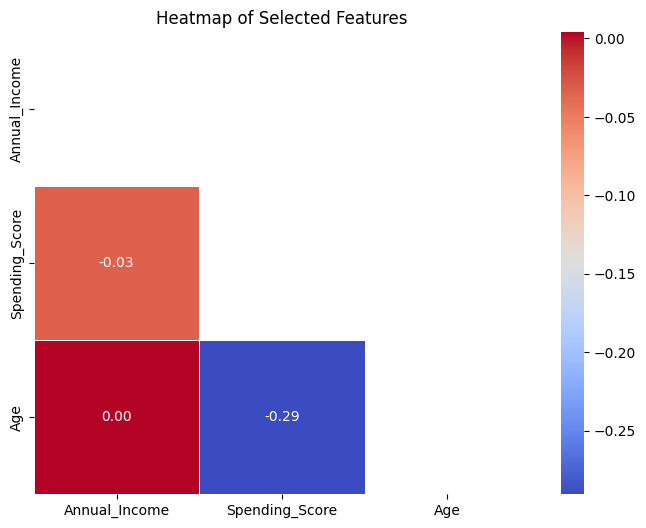


Number of features selected for Boxplots: 3

Selection Criteria: Top 2 Correlated Feature Pairs (Fallback)

Selected Features: Annual_Income, Spending_Score, Age

Boxplots:


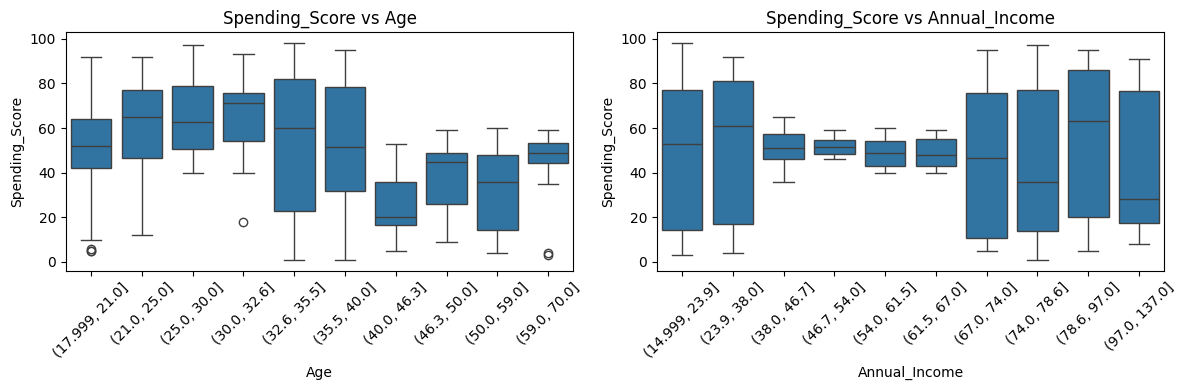


Categorical Feature Distributions by Target Column (Count Plots):


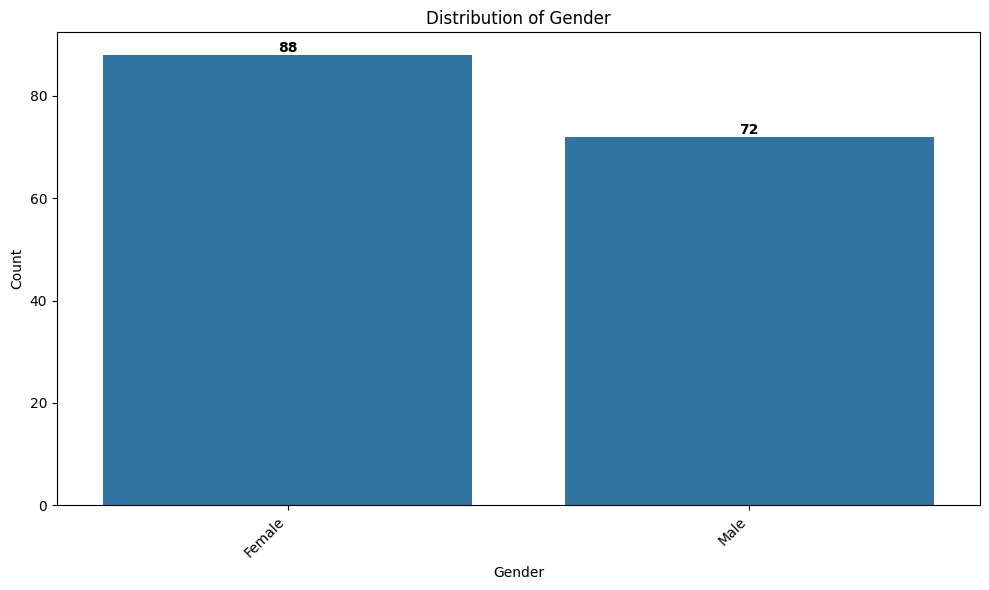


Scatter Plots for Top Correlated Feature Pairs:


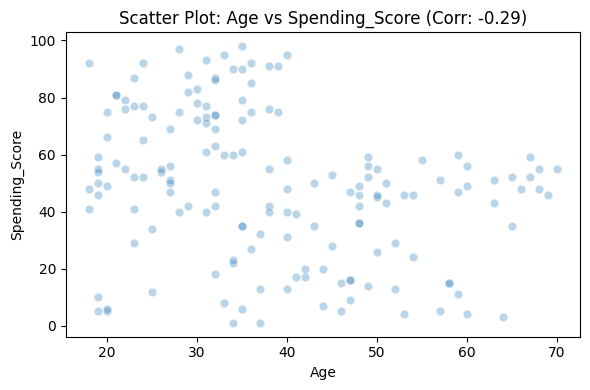

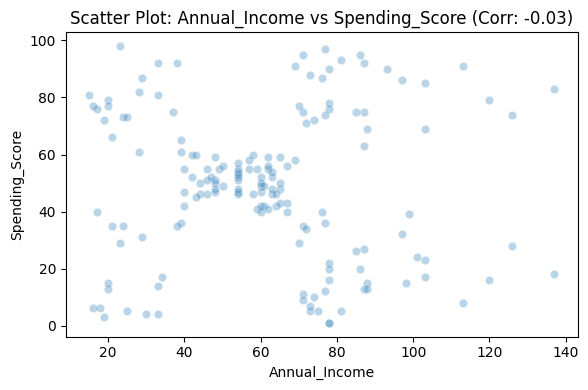

Analysis completed. No action taken.                                                    


Skipping customized anti-select columns.                                                


Analysis indicates all categorical columns are significant. No action Needed.           


Analysis Completed. Dataset does not contain any feature related to dates. No action needed.


Proceeding with default option for missing value imputation.                             
Proceeding with default option for handling remaining missing values.                    


Analysis Completed. No Missing Values Detected.                                          


Analysis completed. No imputation required.                                              


No information provided for Variable-Width Transformation.                               
Skipping customized string manipulation.                                                 


AutoML will proceed with default encoding technique.                                     


['Gender']


Gender_0,Gender_1,Age,Annual_Income,Spending_Score,id
1,0,29,40,42,24
1,0,35,74,72,36
1,0,30,78,78,40
1,0,52,88,13,44
1,0,23,70,29,52
1,0,25,72,34,56
1,0,23,16,77,48
1,0,40,60,40,28
1,0,50,43,45,20
1,0,60,50,49,12


Skipping customized mathematical transformation.                                         


Skipping customized non-linear transformation.                                           


No information provided for performing customized feature scaling. Proceeding with default option.
Skipping  outlier processing.                                                             


['Age', 'Annual_Income', 'Spending_Score']


Gender_1,Gender_0,id,Age,Annual_Income,Spending_Score
1,0,25,1.0669296543341356,-1.0581679426633217,-1.754547419231042
1,0,37,1.8690638669048654,-1.5831504878606286,-1.7935427779026585
1,0,41,0.04603156560775221,0.2917871735583246,1.638048785199588
1,0,45,-1.2665516913261694,-1.733145500774145,1.2480951984834237
1,0,53,2.233670327164288,-0.645681657151152,-0.11674235502315165
1,0,57,-0.9748665231186312,0.5917771993853571,-1.4425845498581105
0,1,12,1.5773786986973273,-0.42068913778087763,0.00024372099169765813
0,1,20,0.848165778178482,-0.6831804103795311,-0.15573771369476808
0,1,24,-0.6831813549110931,-0.7956766700646684,-0.2727237897096174
0,1,28,0.11895285765963674,-0.04570160549708699,-0.3507145070528503


['Age', 'Annual_Income', 'Spending_Score']


Gender_1,Gender_0,id,Age,Annual_Income,Spending_Score
1,0,25,1.0669296543341356,-1.0581679426633217,-1.754547419231042
1,0,37,1.8690638669048654,-1.5831504878606286,-1.7935427779026585
1,0,41,0.04603156560775221,0.2917871735583246,1.638048785199588
1,0,45,-1.2665516913261694,-1.733145500774145,1.2480951984834237
1,0,53,2.233670327164288,-0.645681657151152,-0.11674235502315165
1,0,57,-0.9748665231186312,0.5917771993853571,-1.4425845498581105
0,1,12,1.5773786986973273,-0.42068913778087763,0.00024372099169765813
0,1,20,0.848165778178482,-0.6831804103795311,-0.15573771369476808
0,1,24,-0.6831813549110931,-0.7956766700646684,-0.2727237897096174
0,1,28,0.11895285765963674,-0.04570160549708699,-0.3507145070528503


['col_0', 'col_1', 'col_2', 'col_3']


                                                                                          
Skipping customized hyperparameter tuning


Model: KMeans                                                                                                                                         
name: KMeans
Hyperparameter Grid:
  n_clusters: (2, 3, 4, 5, 6, 7, 8, 9, 10)
  init: ('k-means++', 'random')
  n_init: (5, 10)
  max_iter: (100, 200)
  tol: (0.001, 0.01)
  algorithm: ('auto', 'full')
Total number of models for KMeans: 288
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Model: GaussianMixture
name: GaussianMixture
Hyperparameter Grid:
  n_components: (2, 3, 4, 5, 6, 7, 8, 9, 10)
  covariance_type: ('full', 'tied', 'diag', 'spherical')
  max_iter: (100, 300)
Total number of models for GaussianMixture: 72
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------

,RANK,MODEL_ID,FEATURE_SELECTION,SILHOUETTE,CALINSKI,DAVIES
0,1,KMEANS_1,non_pca,0.612423,442.282630,0.511184
1,2,KMEANS_3,non_pca,0.612423,442.282630,0.511184
2,3,KMEANS_0,pca,0.612423,442.282630,0.511184
3,4,KMEANS_2,pca,0.612423,442.282630,0.511184
4,5,GAUSSIANMIXTURE_3,non_pca,0.576725,392.651805,0.535570
5,6,GAUSSIANMIXTURE_1,non_pca,0.576725,392.651805,0.535570
6,7,GAUSSIANMIXTURE_0,pca,0.576725,392.651805,0.535570
7,8,GAUSSIANMIXTURE_2,pca,0.576725,392.651805,0.535570


In [35]:
cl.fit(cluster_df_train)

## <b><span style='color:#F1A424'>| 4.</span> Leaderboard : </b>

In [36]:
cl.leaderboard()

,RANK,MODEL_ID,FEATURE_SELECTION,SILHOUETTE,CALINSKI,DAVIES
0,1,KMEANS_1,non_pca,0.612423,442.282630,0.511184
1,2,KMEANS_3,non_pca,0.612423,442.282630,0.511184
2,3,KMEANS_0,pca,0.612423,442.282630,0.511184
3,4,KMEANS_2,pca,0.612423,442.282630,0.511184
4,5,GAUSSIANMIXTURE_3,non_pca,0.576725,392.651805,0.535570
5,6,GAUSSIANMIXTURE_1,non_pca,0.576725,392.651805,0.535570
6,7,GAUSSIANMIXTURE_0,pca,0.576725,392.651805,0.535570
7,8,GAUSSIANMIXTURE_2,pca,0.576725,392.651805,0.535570


## <b><span style='color:#F1A424'>| 5.</span> Best Performing Model : </b>

In [37]:
cl.leader()

,RANK,MODEL_ID,FEATURE_SELECTION,SILHOUETTE,CALINSKI,DAVIES
0,1,KMEANS_1,non_pca,0.612423,442.28263,0.511184


## <b><span style='color:#F1A424'>| 6.</span> Get Hyperparameter for Trained Model : </b>

In [38]:
cl.model_hyperparameters(rank=1)

{'n_clusters': 2,
 'init': 'k-means++',
 'n_init': 5,
 'max_iter': 100,
 'tol': 0.001,
 'algorithm': 'auto'}

## <b><span style='color:#F1A424'>| 7.</span> Generate Prediction : </b>

Data Transformation started for clustering ...


Gender_0,Gender_1,Age,Annual_Income,Spending_Score,id
1,0,36,37,26,24
1,0,54,47,59,36
1,0,47,49,42,40
1,0,49,54,42,44
1,0,49,62,48,52
1,0,21,62,42,56
0,1,18,48,59,13
0,1,68,63,43,21
0,1,38,71,75,25
0,1,32,73,73,29


Data Transformation completed.⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿｜ 100% - 9/9            

Following model is being picked for evaluation of clustering:
Model ID : KMEANS_1 
Feature Selection Method : non_pca

Visualizing Clusters for interpretability...
   Gender_1  Gender_0  id       Age  Annual_Income  Spending_Score
0         0         1  12  0.483559      -1.245662       -0.662677
1         1         0  13 -1.485316      -0.495687        0.390197
2         0         1  20 -0.610260      -1.020669        0.936132
3         1         0  21  2.160749       0.066795       -0.233728
4         0         1  24 -0.172732      -0.908173       -0.896650
Selection Criteria: Top 2 High Variance Features
Selected Features: Age, Spending_Score


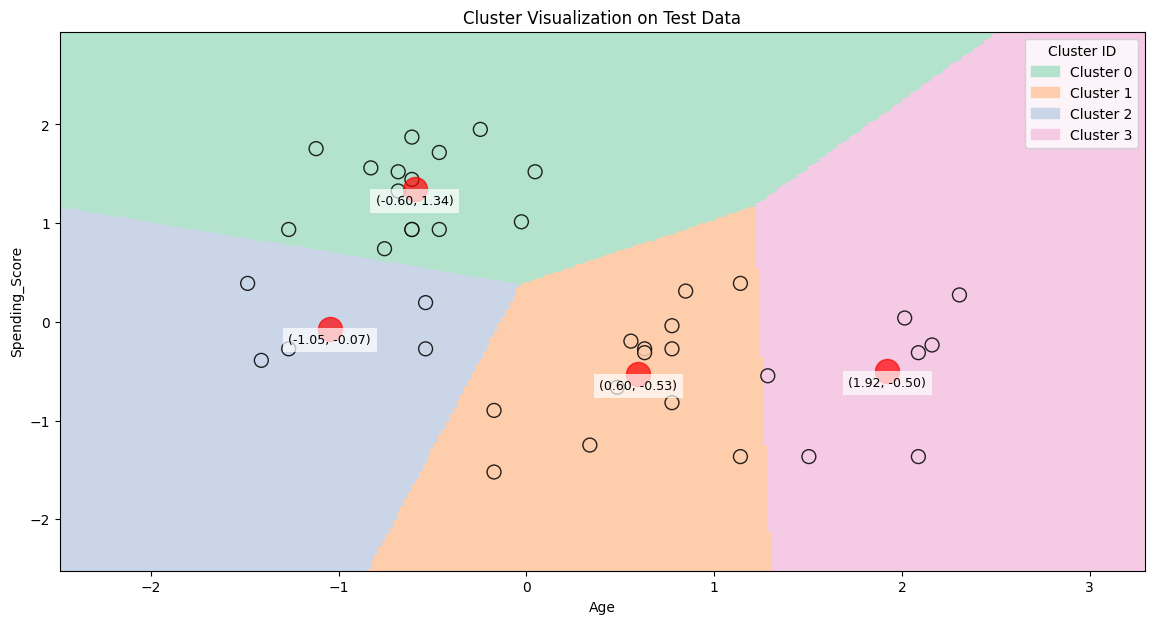


 Cluster Assignment:
   id  cluster_assignment
0  56                   1
1  72                   1
2  76                   1
3  80                   1
4  92                   1
5  96                   1
6  88                   1
7  60                   1
8  52                   1
9  40                   1


In [39]:
prediction = cl.predict(cluster_df_test, rank=1)

In [40]:
prediction.head()

id,cluster_assignment
8,1
12,1
13,1
16,1
20,1
21,1
17,1
9,1
5,1
4,1



Skipping data transformation as data is already transformed.

Following model is being picked for evaluation of clustering:
Model ID : KMEANS_3 
Feature Selection Method : non_pca

Visualizing Clusters for interpretability...
   Gender_1  Gender_0  id       Age  Annual_Income  Spending_Score
0         0         1  12  0.483559      -1.245662       -0.662677
1         1         0  13 -1.485316      -0.495687        0.390197
2         0         1  20 -0.610260      -1.020669        0.936132
3         1         0  21  2.160749       0.066795       -0.233728
4         0         1  24 -0.172732      -0.908173       -0.896650
Selection Criteria: Top 2 High Variance Features
Selected Features: Age, Spending_Score


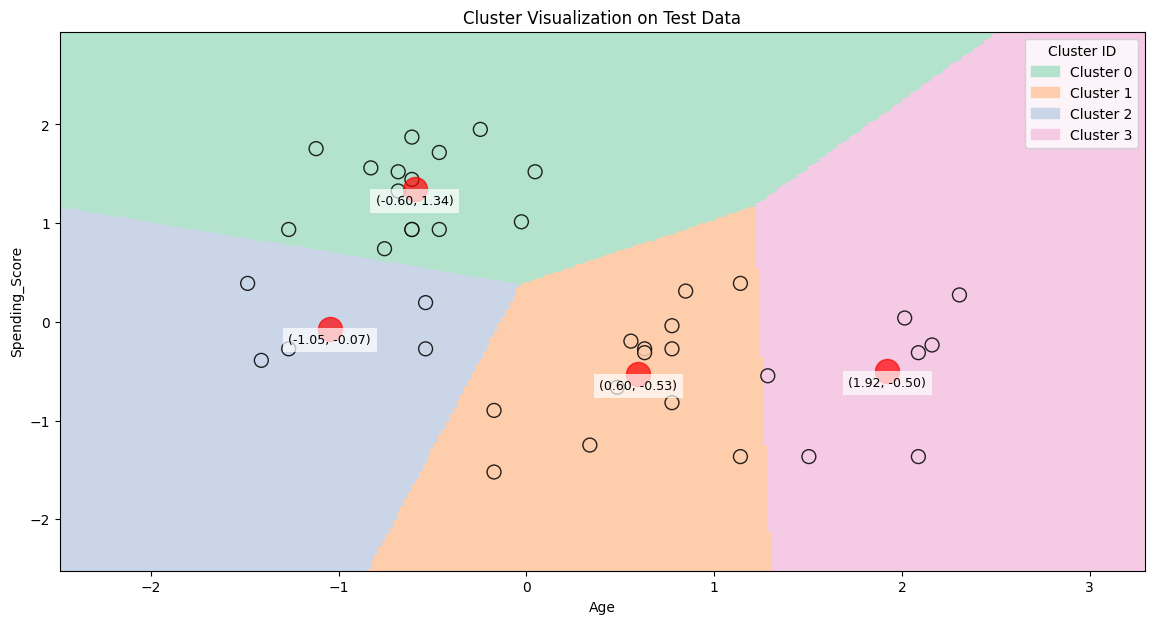


 Cluster Assignment:
   id  cluster_assignment
0  56                   1
1  72                   1
2  76                   1
3  80                   1
4  92                   1
5  96                   1
6  88                   1
7  60                   1
8  52                   1
9  40                   1


In [41]:
prediction_2 = cl.predict(cluster_df_test, rank=2)


Skipping data transformation as data is already transformed.

Following model is being picked for evaluation of clustering:
Model ID : KMEANS_0 
Feature Selection Method : pca

Visualizing Clusters for interpretability...
   id     col_0     col_1     col_2     col_3
0  12  0.657445 -1.308228  0.222367 -0.660684
1  13 -1.319611 -0.306829  0.799762  0.856729
2  20 -1.216163 -0.934588 -0.157029 -0.564236
3  21  1.727215 -0.182290 -1.361221  0.680810
4  24  0.393591 -0.899870  0.824699 -0.647137
Selection Criteria: Top 2 High Variance Features
Selected Features: col_0, col_1


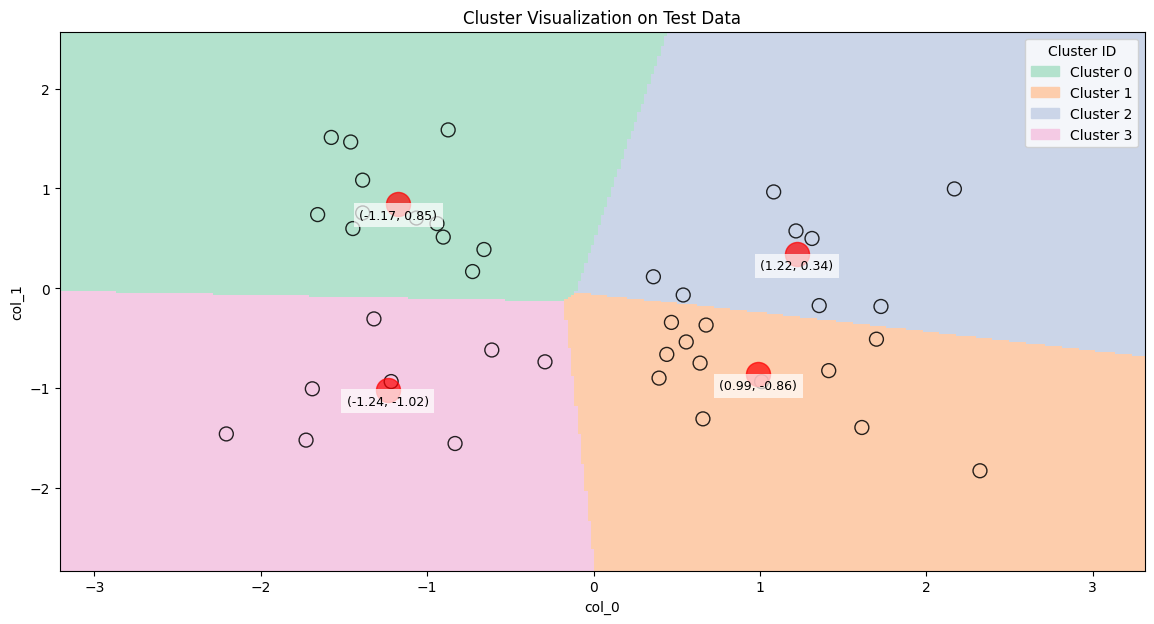


 Cluster Assignment:
   id  cluster_assignment
0  37                   1
1  44                   1
2  45                   1
3  48                   1
4  53                   1
5  56                   1
6  52                   1
7  40                   1
8  36                   1
9  25                   1


In [42]:
prediction_3 = cl.predict(cluster_df_test, rank=3)

Data Transformation started for clustering ...


Gender_0,Gender_1,Age,Annual_Income,Spending_Score,id
0,1,25,24,73,25
0,1,35,28,61,37
0,1,60,30,4,41
0,1,53,33,4,45
0,1,48,39,36,53
0,1,33,42,60,57
0,1,24,38,92,49
0,1,31,25,73,29
0,1,35,24,35,21
0,1,22,20,79,13


Data Transformation completed.⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿｜ 100% - 9/9            

Following model is being picked for evaluation of clustering:
Model ID : KMEANS_1 
Feature Selection Method : non_pca

Visualizing Clusters for interpretability...
   Gender_1  Gender_0  id       Age  Annual_Income  Spending_Score
0         0         1  12 -0.610260      -1.583150        0.897137
1         1         0  13 -1.193630      -1.545652        1.170104
2         0         1  20 -1.047788      -1.545652        1.092114
3         1         0  21 -0.245654      -1.395657       -0.545691
4         0         1  24 -0.245654      -1.508153       -0.545691
Selection Criteria: Top 2 High Variance Features
Selected Features: Age, Annual_Income


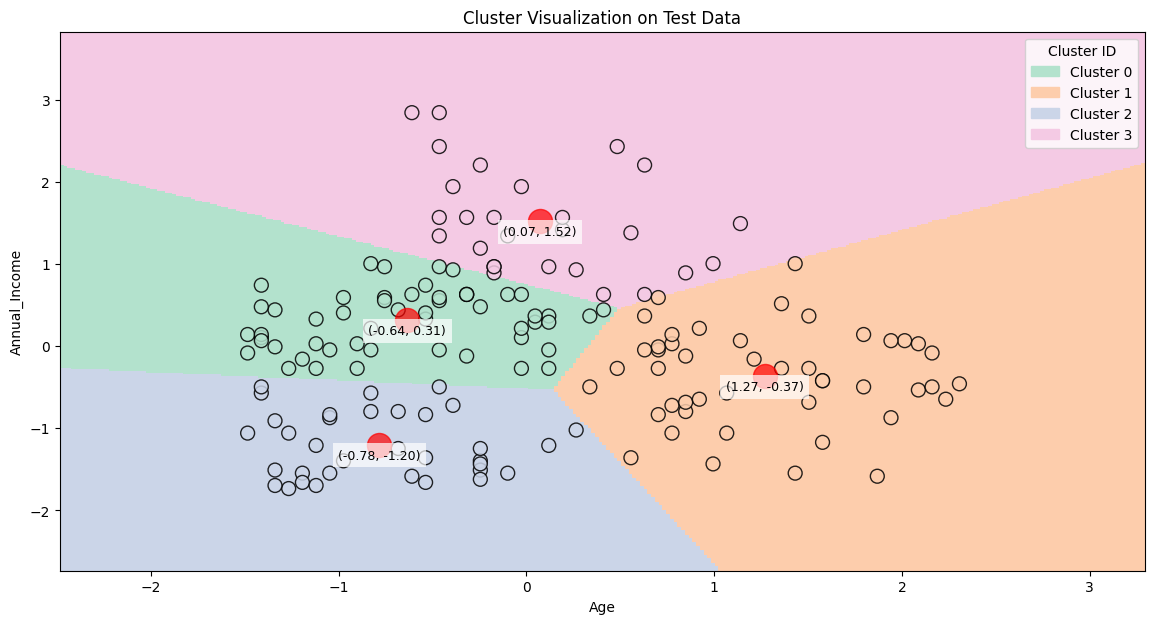


 Cluster Assignment:
   id  cluster_assignment
0  56                   1
1  72                   1
2  76                   1
3  80                   1
4  92                   1
5  96                   1
6  88                   1
7  60                   1
8  52                   1
9  40                   1


In [43]:
prediction_4 = cl.predict(cluster_df_train, rank=1)


Skipping data transformation as data is already transformed.

Following model is being picked for evaluation of clustering:
Model ID : KMEANS_2 
Feature Selection Method : pca

Visualizing Clusters for interpretability...
   id     col_0     col_1     col_2     col_3
0  12 -1.240344 -1.493707 -0.088719 -0.557812
1  13 -1.761825 -1.372448  0.118757  0.886676
2  20 -1.681035 -1.402684  0.077986 -0.533975
3  21  0.126559 -1.358360  0.656297  0.786827
4  24  0.039797 -1.482197  0.670940 -0.623697
Selection Criteria: Top 2 High Variance Features
Selected Features: col_0, col_1


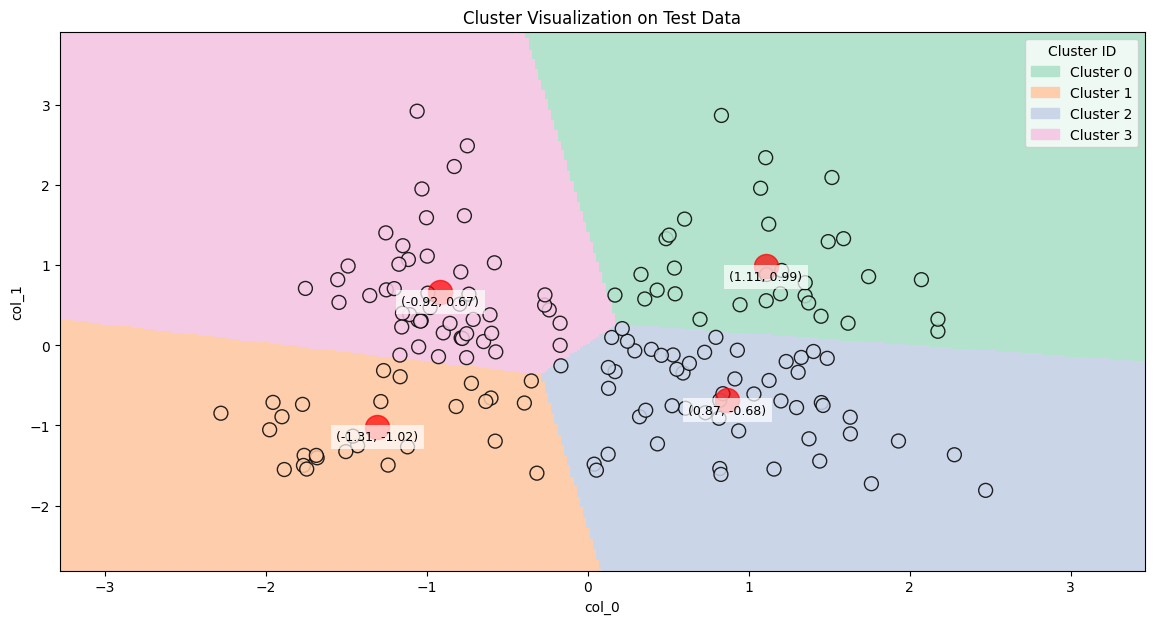


 Cluster Assignment:
   id  cluster_assignment
0  37                   1
1  44                   1
2  45                   1
3  48                   1
4  53                   1
5  56                   1
6  52                   1
7  40                   1
8  36                   1
9  25                   1


In [44]:
prediction_5 = cl.predict(cluster_df_train, rank=4)

In [46]:
remove_context()

True